In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle
sns.set()

In [2]:
# 데이터 로드
with open('./pkl/equity_price.pkl', 'rb') as f:
    df = pickle.load(f)

df.dropna(inplace=True)
df

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2019-03-20,47.040,191.12,110.77,376.16,133.01,163.51,53.26,124.69,109.99,49.80,...,78.2654,117.52,86.69,101.72,131.33,250.50,153.75,57.67,62.79,98.64
2019-03-21,48.773,191.89,111.82,372.70,134.06,166.95,53.94,125.86,108.66,48.98,...,79.0950,120.22,88.01,102.49,134.37,252.02,155.80,58.29,63.60,99.06
2019-03-22,47.763,186.70,109.46,362.17,129.77,161.50,52.74,123.09,108.23,48.60,...,78.4657,117.05,82.19,101.66,134.90,247.09,153.07,59.76,62.41,98.28
2019-03-25,47.185,186.59,109.04,370.46,131.38,160.88,52.73,122.89,107.79,49.15,...,78.5229,117.66,82.33,101.96,134.95,246.86,153.03,60.08,61.69,98.17
2019-03-26,46.698,188.27,109.50,370.38,131.84,159.40,53.23,124.13,110.14,48.85,...,79.0664,117.91,83.38,103.02,134.98,243.39,155.30,60.63,61.92,98.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,138.980,245.44,137.35,131.57,179.75,142.57,39.58,157.17,93.10,43.95,...,91.0500,225.41,87.99,124.23,159.46,499.81,179.14,35.94,32.61,132.67
2022-10-12,138.340,246.44,136.74,130.42,179.50,142.29,39.27,157.64,93.41,43.81,...,90.4200,225.75,88.51,124.43,159.16,499.96,178.24,35.68,31.94,131.17
2022-10-13,142.990,251.66,141.55,132.40,183.14,145.44,40.61,165.28,96.64,45.92,...,92.4900,234.24,89.56,126.31,165.51,509.91,184.66,36.40,33.65,132.28
2022-10-14,138.380,251.34,136.81,133.15,178.19,142.22,40.20,160.14,94.45,45.12,...,92.1800,228.56,87.55,125.08,163.30,513.13,182.62,36.38,33.24,130.43


<Axes: title={'center': 'Correlation Matrix'}>

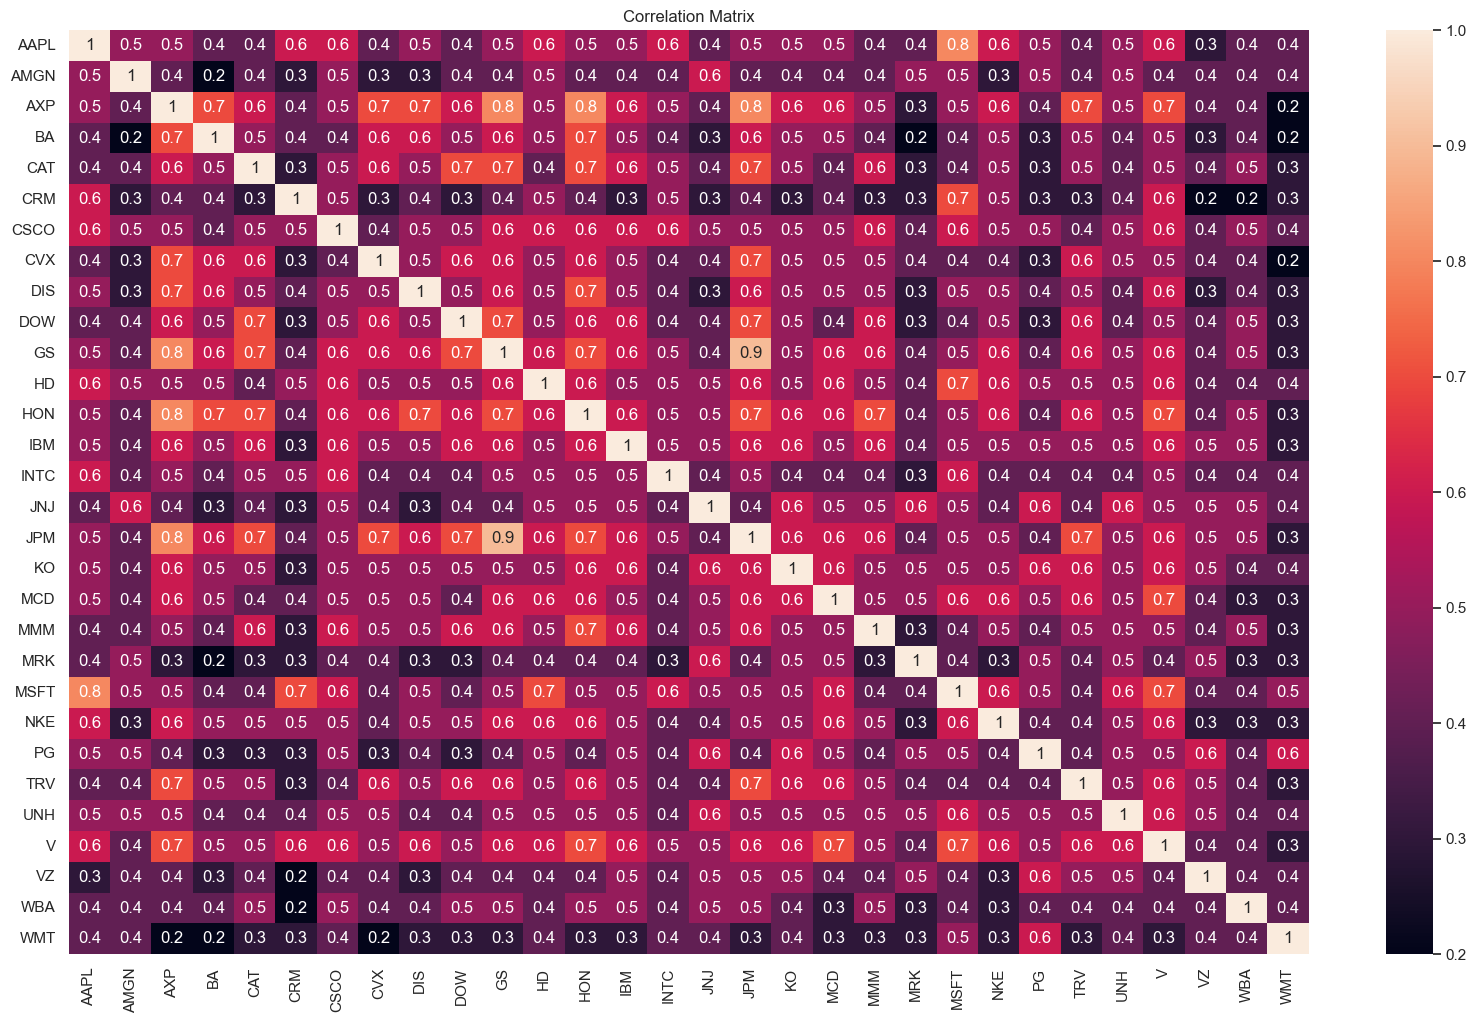

In [3]:
# 수익률 데이터
rets = df.pct_change().dropna()

# 상관계수 행렬
corr = rets.corr()

# 상관계수 히트맵
plt.figure(figsize=(20, 12))
plt.title('Correlation Matrix')
sns.heatmap(np.round(corr, 1), annot=True)

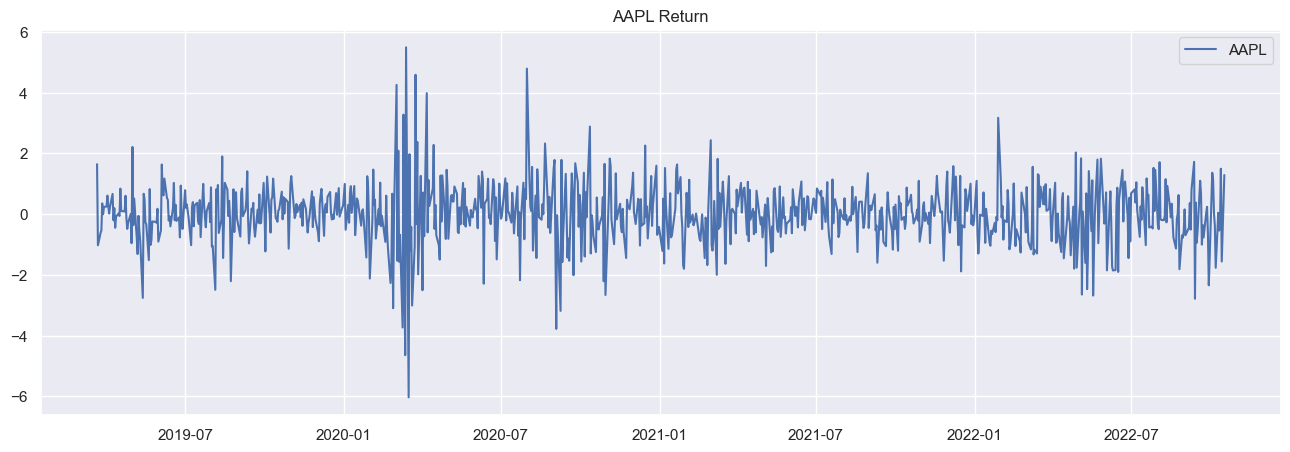

In [4]:
# 수익률 데이터 정규화
scaler = StandardScaler().fit(rets)
rescaledDataset = pd.DataFrame(scaler.fit_transform(rets), columns=rets.columns, index=rets.index)
rescaledDataset.dropna(how='any', inplace=True)

# 정규화된 데이터 예시
plt.figure(figsize=(16, 5))
plt.title('AAPL Return')
rescaledDataset['AAPL'].plot()
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# PCA 모델 피팅
pca = PCA()
PrincipalComponent = pca.fit(rescaledDataset)

<Axes: title={'center': 'Cumulative Explained Variance'}>

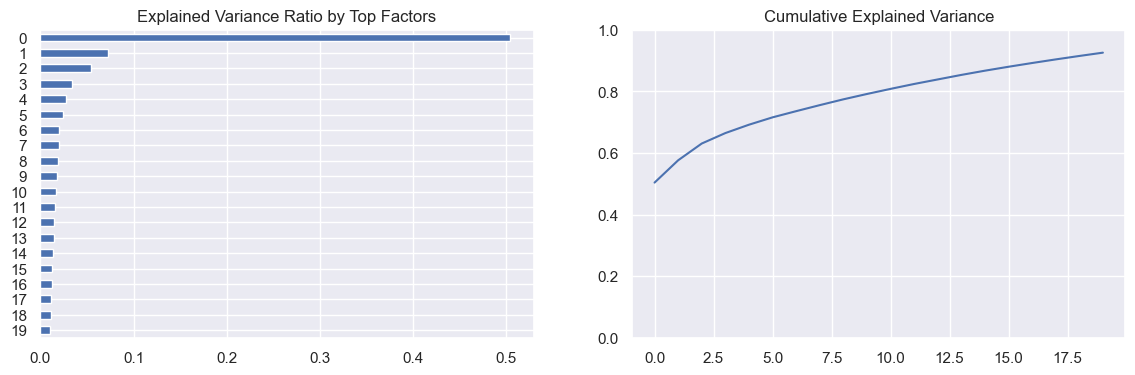

In [6]:
# 주성분분석 결과 시각화
NumEigenvalues = 20

fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()
Series1.plot.barh(title='Explained Variance Ratio by Top Factors', ax=axes[0])
Series2.plot(ylim=(0, 1), ax=axes[1], title='Cumulative Explained Variance')

In [7]:
# 고유 포트폴리오 가중치
NumComponents = 5
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=rets.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range(NumComponents)]

In [8]:
eigen_portfolios

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Portfolio 0,0.033562,0.028547,0.038355,0.031590,0.034664,0.027231,0.035454,0.033309,0.033754,0.034152,...,0.026980,0.035621,0.032941,0.030984,0.034449,0.033151,0.038315,0.028691,0.028335,0.023197
Portfolio 1,0.350140,0.710246,-0.635598,-0.700448,-0.520032,0.206457,0.257767,-0.554567,-0.436026,-0.494682,...,0.599359,0.449330,-0.100835,0.843934,-0.251083,0.325837,-0.076913,0.464573,0.103092,0.832497
Portfolio 2,-4.314517,1.353574,-0.073585,-0.825523,2.141428,-5.726805,-0.960877,1.657906,-1.905809,1.816696,...,2.320365,-4.661264,-2.847846,1.466989,1.941875,0.499030,-2.177573,3.724675,3.035633,0.319842
Portfolio 3,1.018161,-0.021533,-0.998691,-0.373347,1.974343,0.016333,1.726097,-1.168026,0.039046,1.590407,...,-2.890754,0.282253,-0.182273,-0.223254,-1.997003,-1.787189,-1.457201,-0.193044,3.578894,2.096455
Portfolio 4,3.892378,14.801328,-1.385352,-4.249293,6.089261,4.471166,1.798581,8.675456,-7.799332,4.115024,...,12.809218,4.305749,-6.483719,-11.857941,-1.867748,7.253982,-0.657573,-5.954754,-0.906372,-12.810731


array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>],
       [<Axes: title={'center': 'Portfolio 4'}>]], dtype=object)

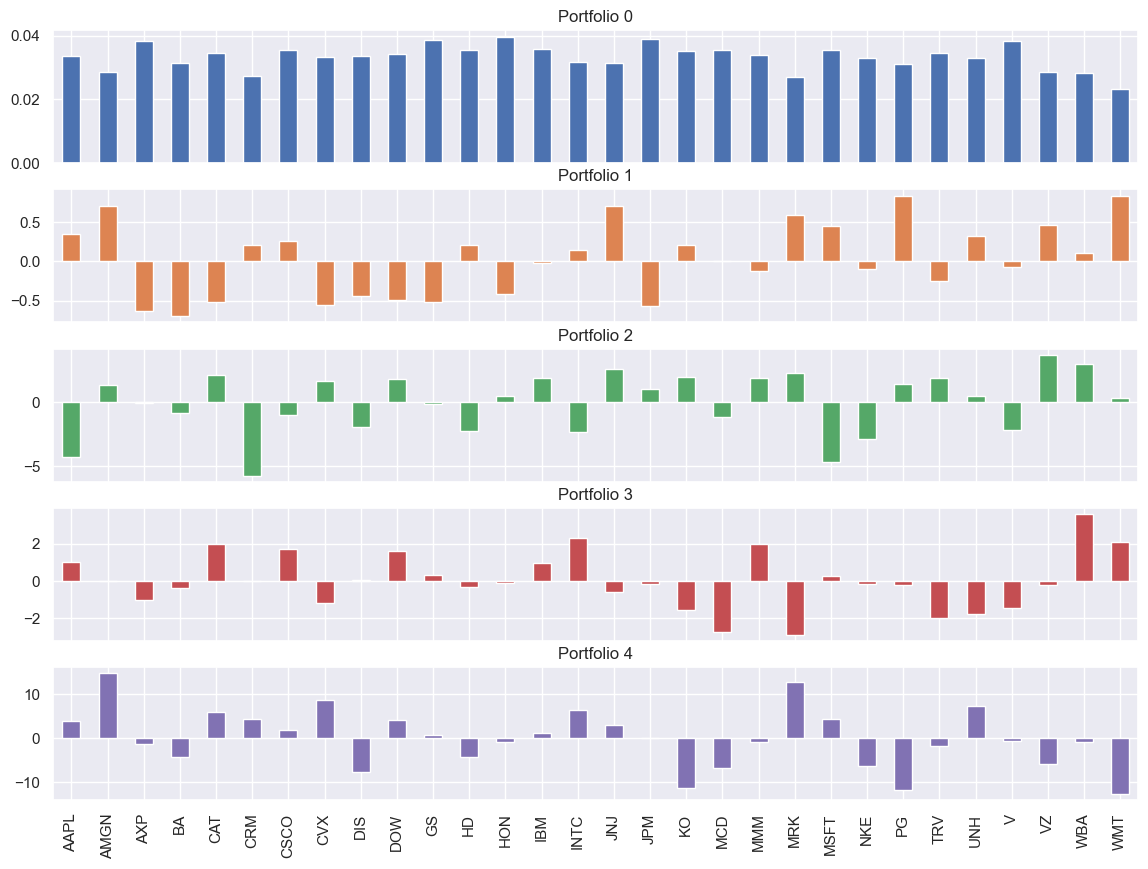

In [9]:
# 시각화
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents), 1), figsize=(14, 10), legend=False)